In [18]:
using wgregseq, Statistics, Distributions, CSV, DataFrames, CairoMakie

## Generate random sequences

In [37]:
scores = CSV.read("illumina_scores.txt", DataFrame, ignorerepeated=true, delim=" ", header=["Symbol", "ASCII", "Score"])
score_dict = Dict(scores.Score .=> scores.Symbol);
(d::Dict)(k) = d[k]

### Promoter sequence

Generate promoter sequences of 160 base pairs.

In [41]:
n_promoters = 1500
promoter_length = 160
average_qual = 35
N = truncated(Poisson(average_qual), upper=40)

promoters = [join(rand(['A', 'C', 'G', 'T'], promoter_length)) for _ in 1:n_promoters]
barcode_qualities = [join(score_dict.(rand(N, promoter_length)))  for _ in 1:n_promoters];

### Barcodes

Choose a number of barcodes for each promoter, then create random barcodes.

In [44]:
n_barcodes_avg = 10
barcode_length = 20
average_qual = 35


n_barcodes = rand(Poisson(n_barcodes_avg), n_promoters)
barcodes = [[join(rand(['A', 'C', 'G', 'T'], barcode_length)) for _ in 1:n_barcodes[j]] for j in 1:n_promoters]
barcode_qualities = [[join(score_dict.(rand(N, barcode_length)))  for _ in 1:n_barcodes[j]] for j in 1:n_promoters];

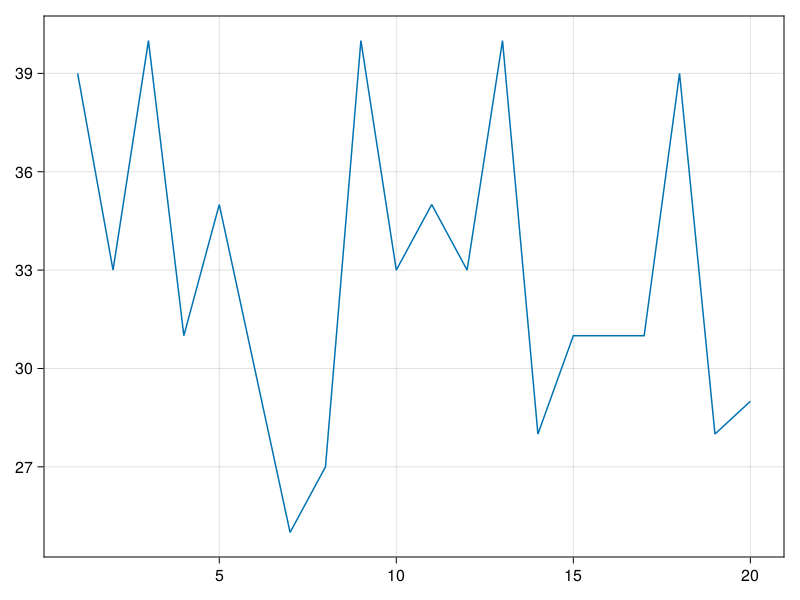

In [26]:



x = rand(N, 20)
lines(x)

In [21]:
truncated(Poisson(average_qual), upper=40)

Truncated(Poisson{Float64}(λ=32.0); upper=40.0)